In [2]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
scRNA = readRDS('./after_rename.rds')

In [4]:
scRNA

An object of class Seurat 
36329 features across 40884 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Warning message:
“Could not find Cd40 in the default search locations, found in RNA assay instead”


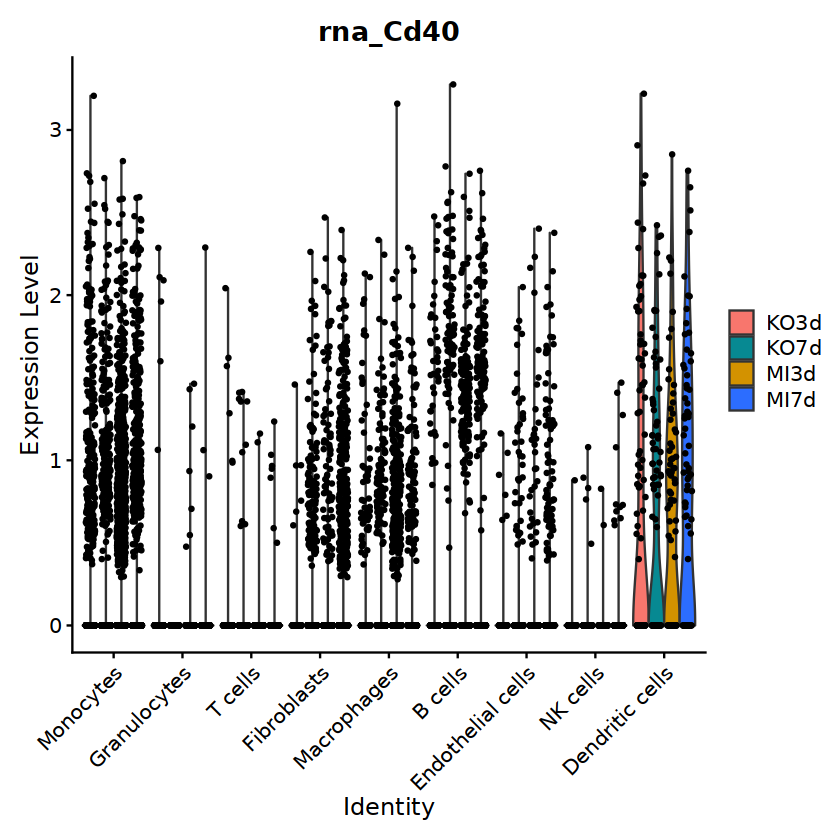

In [5]:
VlnPlot(scRNA,features = 'Cd40',split.by = 'orig.ident')

In [6]:
Idents(scRNA) = 'celltype'
T= subset(scRNA, idents= c('T cells'))

In [7]:
immune.combined = T

In [8]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 30, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.4)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2253 anchors

Filtering anchors

	Retained 1628 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1848 anchors

Filtering anchors

	Retained 1345 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1860 anchors

Filtering anchors

	Retained 1613 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2239 anchors

Filtering anchors

	Retained 1534 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2710 anchors

Filtering anchors

	Retained 2117 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2068 anchors

Filtering anchors

	Retained 1447 anchors

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vecto

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3448
Number of edges: 132317

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8951
Number of communities: 10
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:27:40 UMAP embedding parameters a = 0.9922 b = 1.112

21:27:40 Read 3448 rows and found 20 numeric columns

21:27:40 Using Annoy for neighbor search, n_neighbors = 30

21:27:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:27:41 Writing NN index file to temp file /tmp/Rtmpd8Nqyv/file5c1b246381a6

21:27:41 Searching Annoy index using 1 thread, search_k = 3000

21:27:42 Annoy recall = 100%

21:27:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

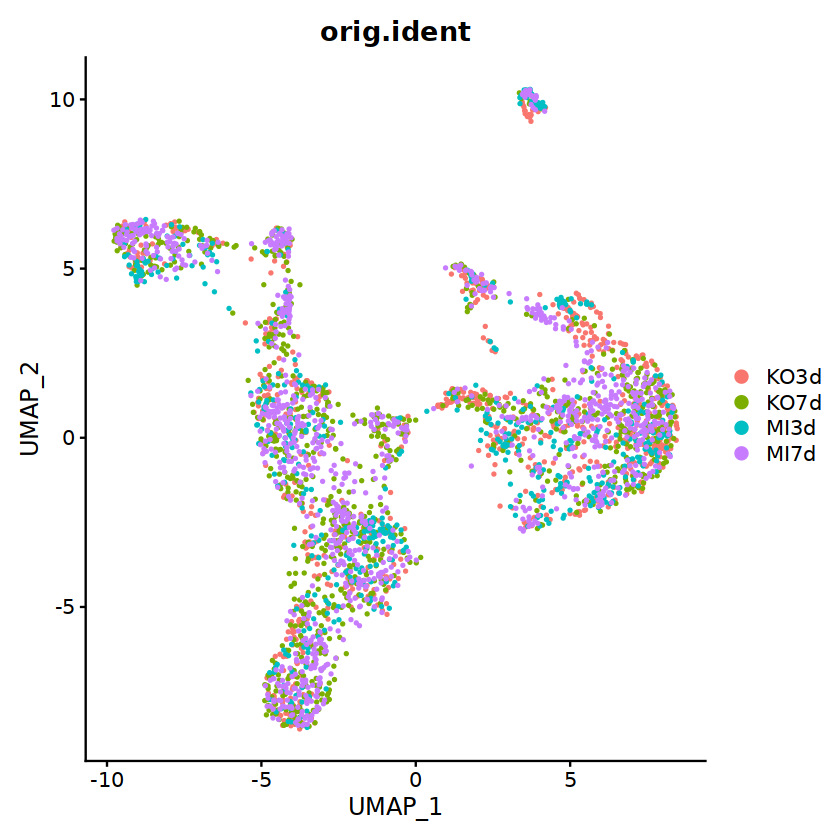

In [9]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

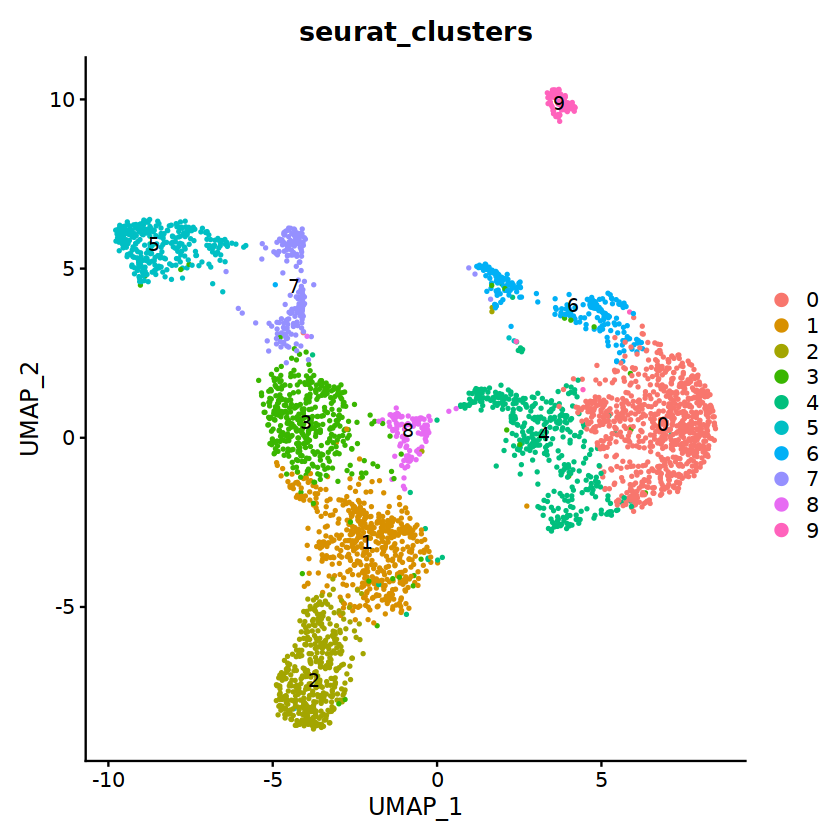

In [21]:
DimPlot(immune.combined, reduction = "umap", group.by = "seurat_clusters",label = TRUE)

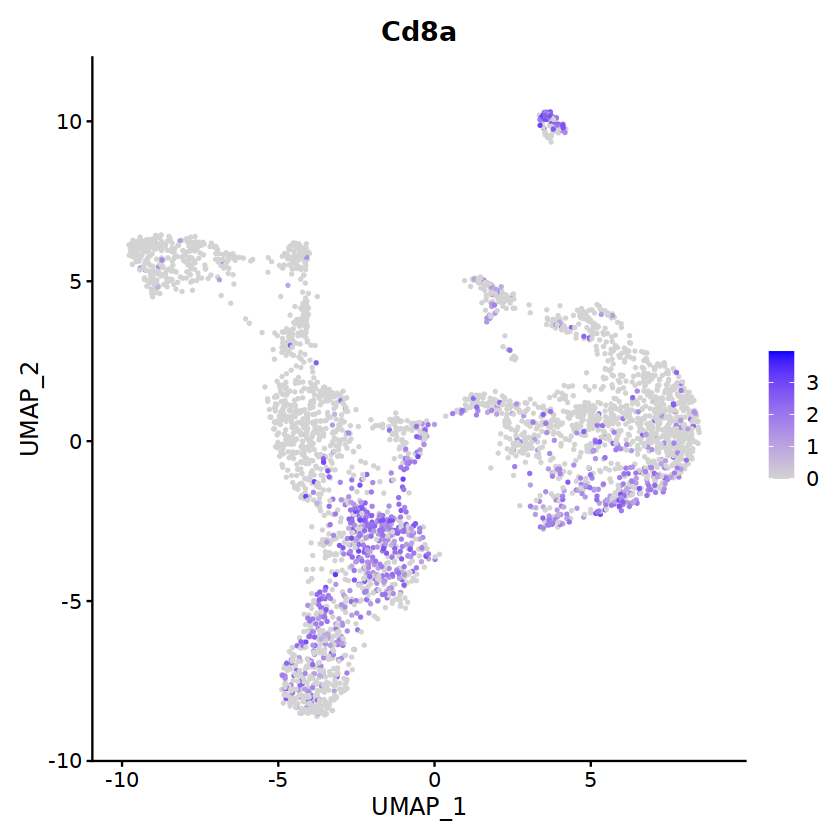

In [30]:
FeaturePlot(immune.combined,features = c('Cd8a'))

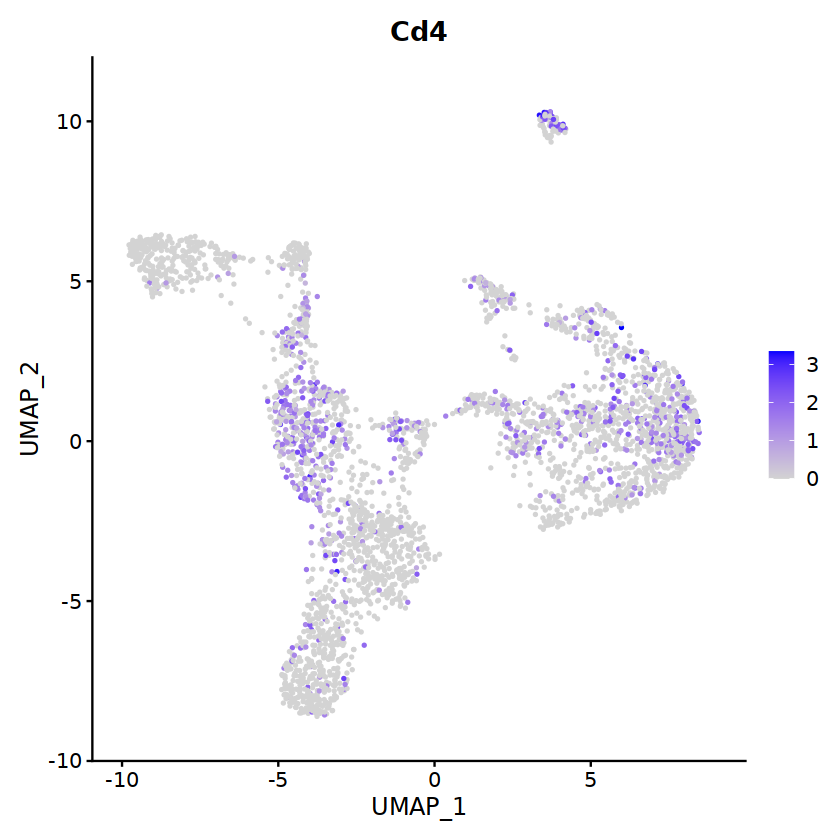

In [26]:
FeaturePlot(immune.combined,features = c('Cd4'))

In [11]:
Idents(immune.combined) = 'seurat_clusters'
sce.markers <- FindAllMarkers(object = immune.combined, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [12]:
write.csv(sce.markers,file = 'sce.markers.csv')

In [19]:
DefaultAssay(immune.combined) = 'RNA'

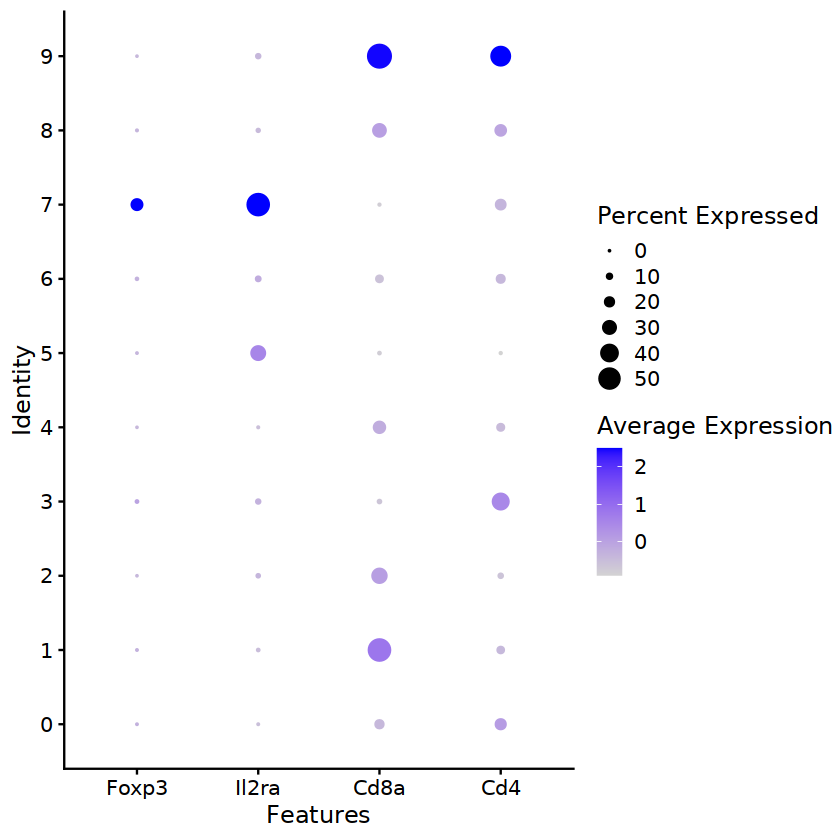

In [20]:
DotPlot(immune.combined,features = c('Foxp3','Il2ra','Cd8a','Cd4'))

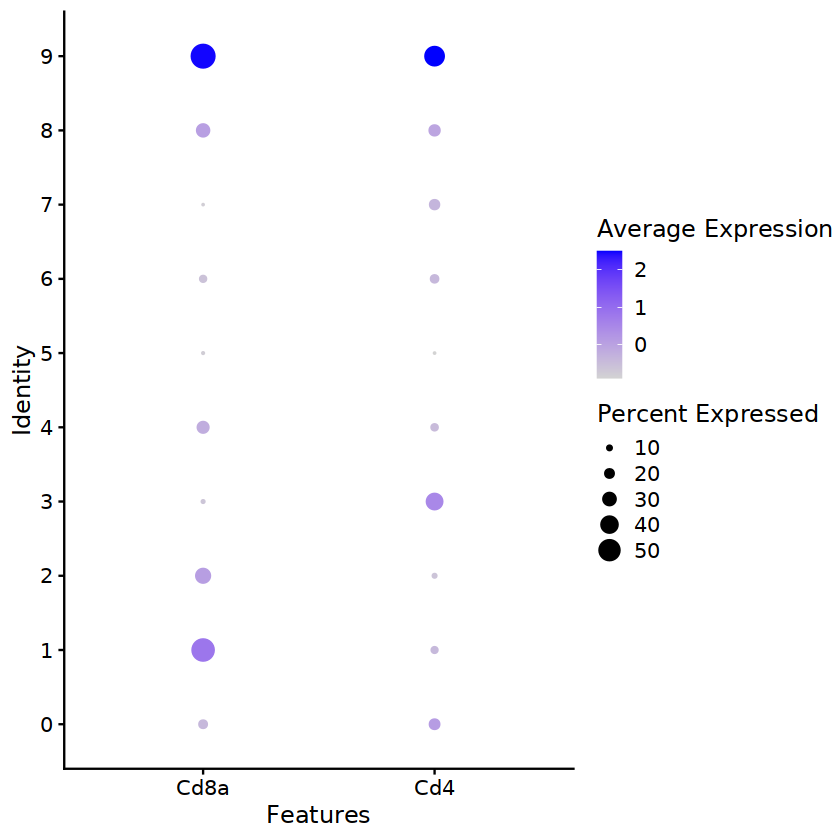

In [28]:
DotPlot(immune.combined,features = c('Cd8a','Cd4'))


KO3d KO7d MI3d MI7d 
 829  954  564 1101 


         0          1          2          3          4          5          6 
0.23201856 0.14936195 0.12441995 0.12267981 0.11310905 0.08584687 0.06206497 
         7          8          9 
0.05539443 0.03161253 0.02349188 

   
    KO3d KO7d MI3d MI7d
  0  221  199  115  265
  1   99  165   97  154
  2   85  156   45  143
  3   72  119   66  166
  4  150   81   87   72
  5   53   83   60  100
  6   86   27   36   65
  7   27   65   21   78
  8   17   49    7   36
  9   19   10   30   22

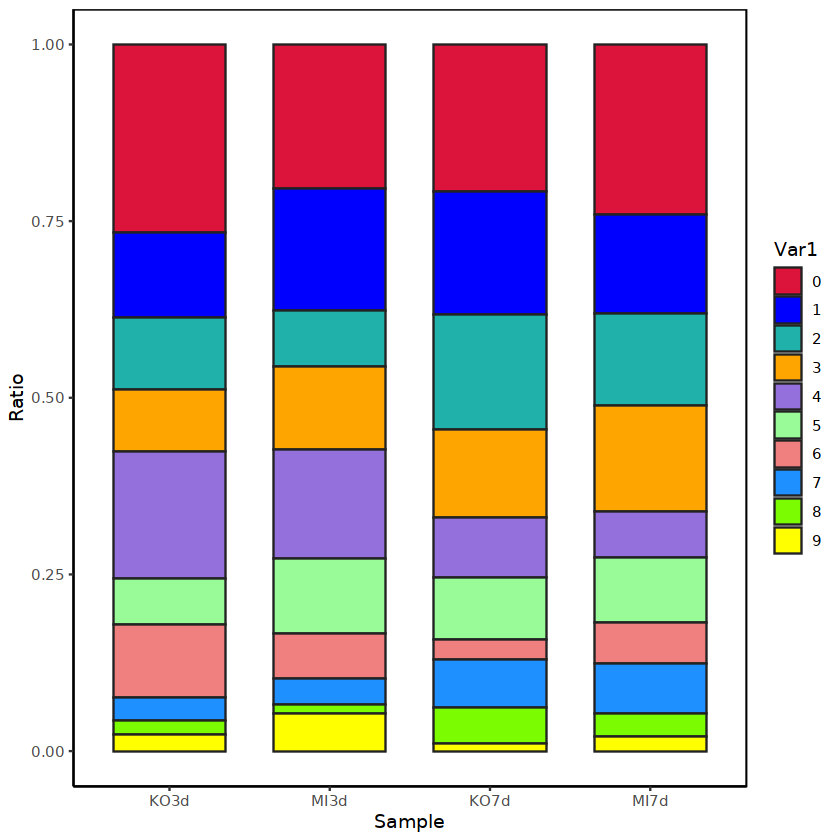

In [16]:
scRNA = immune.combined

Idents(scRNA) ='seurat_clusters'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)